In [1]:
# No olvidar que en "google colab" hay que instalar qiskit

########################
# Instala versión 0.45.2
########################
# Importante, poner qiskit-aer en la misma linea de "pip install" para que coja la versión adecuada
try:
    import google.colab
    print("In colab, let's install things...")
    #
    !pip install qiskit[visualization]==0.45.2 qiskit-aer qiskit-ibm-runtime
except ImportError:
    print("NOT in colab")

NOT in colab


In [2]:
import qiskit
from qiskit_aer import AerSimulator
import qiskit.tools.jupyter
%qiskit_version_table
print('Qiskit version', qiskit.__version__)
import numpy
import scipy
print("Numpy version", numpy.__version__)
print("Scipy version", scipy.__version__)

Qiskit version 0.45.2
Numpy version 1.26.4
Scipy version 1.13.1


In [3]:
from IPython.display import display, Latex, Markdown
from matplotlib import pyplot as plt
import scipy.linalg as la
import numpy as np

<a id='sec_Notebooks_Vectores_y_Bloch'></a>
# Vectores de estado y la esfera de Bloch

In [4]:
import numpy as np
from qiskit.quantum_info import Statevector, schmidt_decomposition
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_state_qsphere

Para visualizar vectores en la esfera de Bloch tenemos varias opciones. Una de ellas es un [visualizador online en Java:](https://javafxpert.github.io/grok-bloch/?fbclid=IwAR1lWfCug1lfTXxXenaJxnsdJh2g3he6lBJmjnjL_Jus0gOHR9u3UuaT7qs).

Aquí vamos a centrarnos en la clase <a href=https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html>statevector</a> de *qiskit* que cuenta con un *visualizador* de la esfera de Bloch. La clase  acepta una lista de dos números complejos como componentes de un vector.  


<a id='sec_Notebooks_Vectores_y_Bloch_1'></a>
## La clase Statevactor de Qiskit 

In [5]:
# Ejemplo de vector de estado |+> 
state_plus =[1/np.sqrt(2),1/np.sqrt(2)]

statevector_plus = Statevector(state_plus)

In [6]:
statevector_plus.draw('latex')

<IPython.core.display.Latex object>

In [7]:
statevector_plus.draw('latex_source')

'\\frac{\\sqrt{2}}{2} |0\\rangle+\\frac{\\sqrt{2}}{2} |1\\rangle'

In [8]:
# Para escribirlo en terminal sin ser en un Jupiter
print(statevector_plus.draw('text'))  

[0.70710678+0.j,0.70710678+0.j]


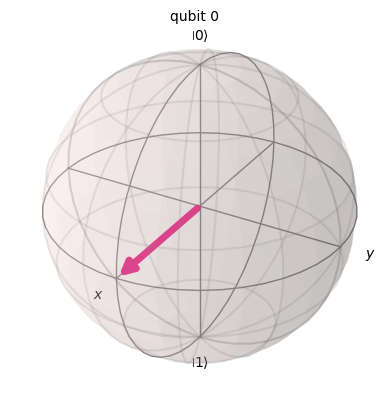

In [9]:
statevector_plus.draw('Bloch')

El método `statevector_plus.draw('Bloch')` nos devuelve una figura de Matplotlib, así que podemos usar métodos como `savefig()`

In [10]:
!pwd
statevector_plus.draw('Bloch').savefig("/tmp/Fig_Bloch_plus_state")

/home/eladio/Mi_investigacion/Q/cursos/cursoUMA/eladio/notebooks-modulo2/notebook_modulo2/github/CEUCC-UMA-2024-modulo2/nb


<a id='sec_Notebooks_Vectores_y_Bloch_2'></a>
## Normalización del vector

Esta rutina no verifica si el vector está normalizado, como podemos ver en el siguiente ejemplo.

In [11]:
state_2 =[5/np.sqrt(2),1/np.sqrt(2)]

statevector_2 = Statevector(state_2)
statevector_2.draw('latex')

<IPython.core.display.Latex object>

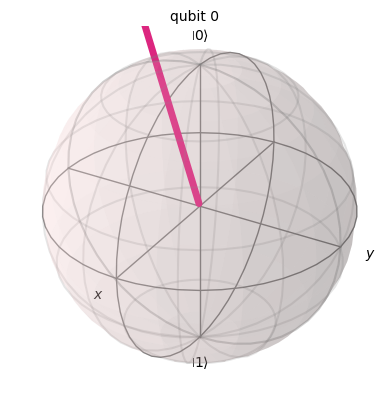

In [12]:
statevector_2.draw('bloch')

Este vector NO está normalizado
El nuevo vector YA está normalizado


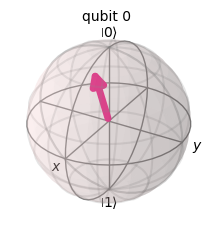

In [13]:
# Podemos comprobar si el vector está o no normalizado:
if statevector_2.is_valid():
    print("Este vector YA está normalizado")
else:
    print("Este vector NO está normalizado")
    
# Para normalizarlo dividimos por su norma
statevector_2_norm = statevector_2 / la.norm(statevector_2)

if statevector_2_norm.is_valid():
    print("El nuevo vector YA está normalizado")
else:
    print("El nuevo vector NO está normalizado")

# Vamos a comprobarlo visualmente
bloch = statevector_2_norm.draw('bloch')
bloch.set_size_inches(2.5, 2.5, forward=True) # Por si queremos escalar la esfers
display(bloch)

In [14]:
# Observa que podemos acceder a los datos "crudos" del vector
display(statevector_2_norm.data)

# Observa que el objeto "raw" es un vector numpy
# esto es dimensionalidad=1
#
# Si quisiéramos tener el vector en formato ket hay
# que redimensionar a dimensionalidad=2, shape=nx1
#
display(statevector_2_norm.data.reshape(2,1))

array([0.98058068+0.j, 0.19611614+0.j])

array([[0.98058068+0.j],
       [0.19611614+0.j]])

<a id='sec_Notebooks_Vectores_y_Bloch_3'></a>
## Estado a partir de los ángulos 

Una forma de construir un estado normalizado es usando la parametrización 

$$
|u\rangle = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle 
$$

Hagamos una función que nos de el estado a partir de los ángulos $\theta$ y $\phi$

In [15]:
def state_from_angles(theta, phi):
    u0 = np.cos(theta/2)
    u1 = (np.exp(1j*phi))*np.sin(theta/2)

    uket = [u0,u1]
    return Statevector(uket)
statevector_y_plus = state_from_angles(np.pi/2, np.pi/2)
statevector_y_plus.draw('Latex')

<IPython.core.display.Latex object>

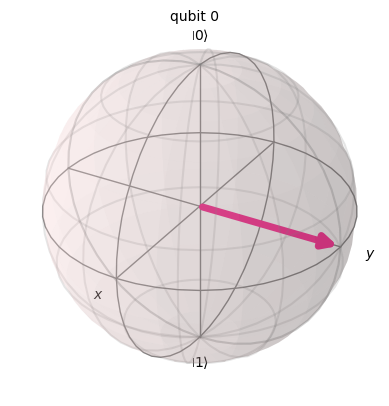

In [16]:
statevector_y_plus.draw('Bloch')

<div style="background-color:#c8e6c9">
<hr>
<b>Ejercicio:</b>
    
  Explora otras maneras de generar el vector de estado:    
- A partir de un entero indicando en nº de vector de la base computacional $\{|0\rangle, |1\rangle, |2\rangle ... \}$
- A partir de una etiqueta como '0','1' (base computacional),'+','-', (base X), 'r','l' (base Y)

Juega en estos casos con el parámetro de dimensión
<hr>
</div>

<a id='sec_Notebooks_Vectores_y_Bloch_4'></a>
## Producto tensorial (de Kronecker)

<IPython.core.display.Latex object>

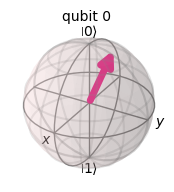

<IPython.core.display.Latex object>

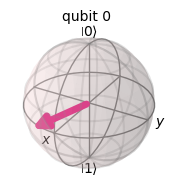

In [17]:
# Definimos una función para visualizar el estado y la esfera a la vez
# Permite escalar la(s) esferas(s) con 'inches' pulgadas, si este parámetro
# no se pone, se dibuja al tamaño por defecto
# Si se pone 0, no se dibuja la esfera
def my_display_state_vector(psi, inches=None):
    d_latex = psi.draw('latex', prefix=r"|\psi\rangle = ")
    display(d_latex)
    #
    d_bloch = psi.draw('bloch')
    if isinstance(inches, (int,float)):
        if inches > 0:
            d_bloch.set_size_inches(inches, inches, forward=True)
            display(d_bloch)
    else:
        display(d_bloch)

# Generamos dos vectores de estado
v1 = np.array([-1, 0.5])
v2 = np.array([1, 1-1j])
s1 = Statevector(v1/la.norm(v1))
s2 = Statevector(v2/la.norm(v2))
                
my_display_state_vector(s1, 2)
my_display_state_vector(s2, 2)

<IPython.core.display.Latex object>

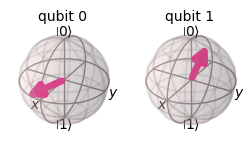

<IPython.core.display.Latex object>

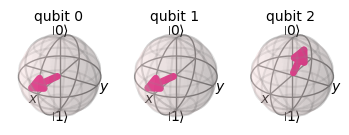

In [18]:
# Vamos a ver diferentes formas de realizar el producto de kronecker

# La primera, usando el operador circunflejo ^
sc1 = s1 ^ s2
sc2 = s1 ^ s2 ^ s2

# Dibujar las multiesferas
my_display_state_vector(sc1,3)
my_display_state_vector(sc2,4.25)

<div style="background-color:#c8e6c9">
<hr>
<b>Ejercicio:</b>
    
Observa las esferas de Bloch y el producto realizado:
- ¿en qué orden de numeración están los qubits en el estado computesto?
- ¿cuál es el más significativo (MSB) y el menos significativo (LSB?
<hr>
</div>

In [19]:
# Usando el método tensor()
#  self.tensor(other) = kron(self, other)

sc1_t = s1.tensor(s2)
sc2_t = s1.tensor(s2.tensor(s2))

my_display_state_vector(sc1_t, 0)
my_display_state_vector(sc2_t, 0)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
# Usando el método expand()
#   self.expand(other) = kron(other,self)

sc1_e = s2.expand(s1)
sc2_e = (s2.expand(s2)).expand(s1)

my_display_state_vector(sc1_e, 0)
my_display_state_vector(sc2_e, 0)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
# Comprobemos que todas las formas de calcular el producto
# tensorial dan el mismo resultado

assert(sc1 == sc1_e)
assert(sc2 == sc2_e)
assert(sc1 == sc1_t)
assert(sc2 == sc2_t)

<div style="background-color:#c8e6c9">
<hr>
<b>Ejercicio:</b>
    
La **descomposición de Schmidt** nos proporciona un criterio para saber si un estado perteneciente a un espacio bipartito $H=H_A \otimes H_B$ es **factorizable** o **entrelazado**.

En quiskit se puede realizar dicha descomposición con este método: https://docs.quantum.ibm.com/api/qiskit/0.46/quantum_info#schmidt_decomposition

Considera que $H$ es de dimensión 4 (2 qubits), producto tensorial de dos espacios de dimensión 2 (1 qubit cada uno):

- Genera varios vectores de $H$ con el producto tensorial y comprueba que la descomposición de Schmidt nos indica que son factorizables.

- Construye también otros vectores de $H$ que no séan factorizables (un truco puede ser eliminando componentes de uno vectorizable, aunque no es condición suficiente). Comprueba que la factorización de Schmidt así lo indica.

<b> <font size="+1"><span style="color:red">[OPCIONAL, PARA OPTAR A NOTA] </span></font></b>

Si se tiene que el espacio de trabalo, $H_n$, es de dimensión $2^n$ (n qubits) producto tensorial de $n$ espacios de dimensión 2 (1 qubit cada uno) $H_n = H_1^{\otimes n}$ con $H_1$ de dimension 2:

- Razona, ¿cómo podríamos usar, en este caso, la descomposición de Schmidt para saber si un estado de $n$ qubits es entrelazado?

- Explica cómo lo harías y qué complejidad computacional implica. No hace falta desarrollar el código, sólo explicar qué habría que hacer.

<hr>
</div>

<a id='sec_Notebooks_Vectores_y_Bloch_5'></a>
## Representación estados no factorizables

Veamos cómo se pueden representar los estados no factorizables _(entangled)_ visualmente.

<IPython.core.display.Latex object>

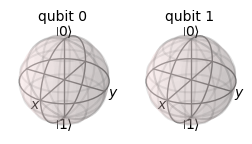

In [22]:
e0 = Statevector([1, 0], dims=2)  # dims indica la dimensión del estado
e1 = Statevector([0, 1], dims=2)

ebell = ((e0^e0)+(e1^e1))/np.sqrt(2)
# Alternativa
#ebell = Statevector([1/sqrt(2), 0, 0, 1/sqrt(2)])

# Como hay entanglement, ¿se pueden representar los qubits por separado?
# Observa el resultado de la(s) esfera(s) de Bloch
my_display_state_vector(ebell,3)

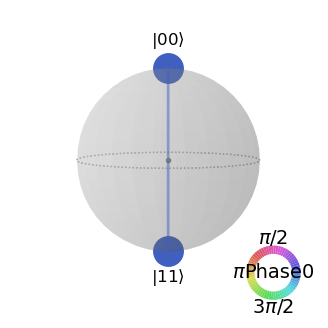

In [23]:
# En estos casos, una forma de visualizar el estado (en Qiskit)
# es usando una Q-esfera.
#
# Cada amplitud se representa por un circulo, cuyo diámetro es proporcional a
# la magnitud de la amplitud. La fase se representa mediante un código de colores.
display(plot_state_qsphere(ebell, figsize=(4,4)))

<IPython.core.display.Latex object>

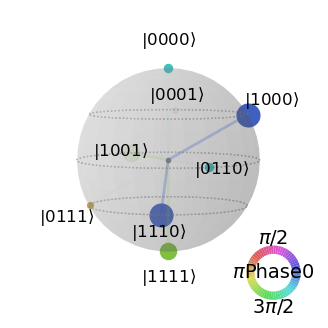

In [24]:
# Mostremos la Q-sphere de un estado con aspecto extraño
eplus = e0 + (2+2j)*e1
eleftminus = Statevector.from_label('l') + Statevector.from_label('-')
strangestate = eplus^ebell^eleftminus
strangestate = strangestate/la.norm(strangestate)
display(strangestate.draw('latex'))
plot_state_qsphere(strangestate, figsize=(4,4))